<a href="https://colab.research.google.com/github/gambal2/PSMDSProjects/blob/main/HR_Analytics_of_IBM_HR_Data_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics of IBM HR Data using Decision Tree

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries and Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Notebooks/Google Data Analytics Capstone Project/IBM_HR.csv")

Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.


# Exploratory Data Analysis

In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [ ]:
print('Number of rows:',df.shape[0])
print('Number of columnns:',df.shape[1])

Number of rows: 23436
Number of columnns: 37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [ ]:
#Checking for Null Values
df.isnull().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

# Handle Missing Values

In [ ]:
#Dropping Null Values
df_droppednull=df.dropna()
print('Number of rows:',df_droppednull.shape[0])
print('Number of columnns:',df_droppednull.shape[1])

Number of rows: 23204
Number of columnns: 37


In [ ]:
df_droppednull.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [ ]:
df_droppednull.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23204.00000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.0,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000,23204.000000
mean,36.91954,802.328349,2.908723,2.719057,2.730133,2.065032,14303.508533,2.689364,3.155232,2.713067,80.0,0.793958,11.265127,2.797793,2.760903,7.014825,4.229185,2.180874,4.129805
std,9.11660,403.193041,1.024811,1.095208,0.710530,1.105769,7099.381683,2.498829,0.362133,1.080830,0.0,0.850652,7.765663,1.290553,0.705886,6.137174,3.626636,3.215231,3.571334
min,18.00000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.00000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.00000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.00000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.00000,1499.000000,5.000000,4.000000,4.000000,5.000000,26999.000000,9.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_droppednull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23204 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23204 non-null  float64
 1   Attrition                 23204 non-null  object 
 2   BusinessTravel            23204 non-null  object 
 3   DailyRate                 23204 non-null  float64
 4   Department                23204 non-null  object 
 5   DistanceFromHome          23204 non-null  object 
 6   Education                 23204 non-null  float64
 7   EducationField            23204 non-null  object 
 8   EmployeeCount             23204 non-null  object 
 9   EmployeeNumber            23204 non-null  object 
 10  Application ID            23204 non-null  object 
 11  EnvironmentSatisfaction   23204 non-null  float64
 12  Gender                    23204 non-null  object 
 13  HourlyRate                23204 non-null  object 
 14  JobInv

In [ ]:
df_final = df_droppednull.drop_duplicates()
print('Number of rows:',df_droppednull.shape[0])
print('Number of columnns:',df_droppednull.shape[1])

Number of rows: 23204
Number of columnns: 37


In [ ]:
df_final_attr = df_final[df_final['Attrition'] == 'Voluntary Resignation']

# Descriptive Analytics and Visualization

In [ ]:
df_final['Department'].value_counts()

Research & Development    15125
Sales                      7056
Human Resources            1009
Name: Department, dtype: int64

In [ ]:
df_final['DistanceFromHome'] = df_final['DistanceFromHome'].astype(float, errors = 'raise')
df_final['HourlyRate'] = df_final['HourlyRate'].astype(float, errors = 'raise')
df_final['JobSatisfaction'] = df_final['JobSatisfaction'].astype(float, errors = 'raise')
df_final['PercentSalaryHike'] = df_final['PercentSalaryHike'].astype(float, errors = 'raise')
df_final['MonthlyIncome'] = df_final['MonthlyIncome'].astype(float, errors = 'raise')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

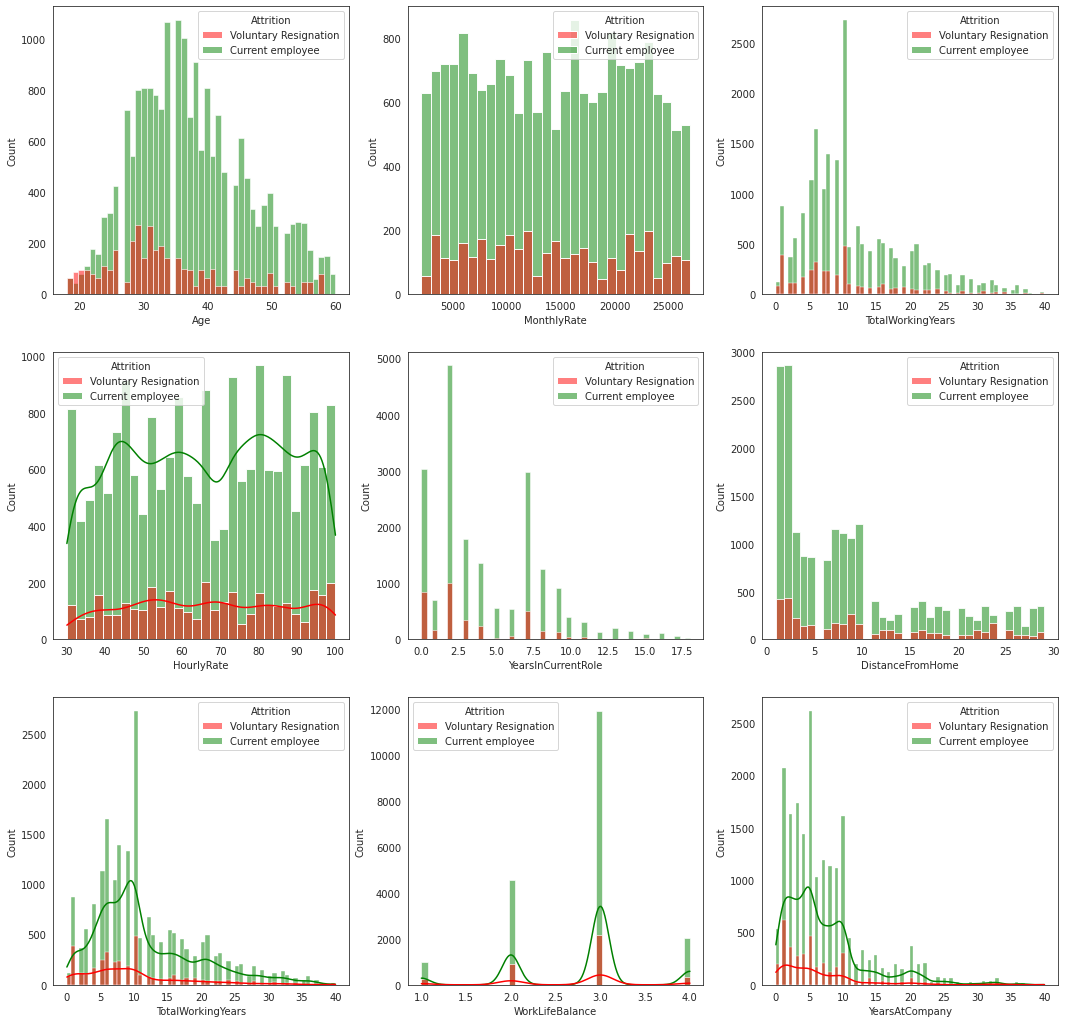

In [ ]:
#Histograms of All Numeric Data
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.histplot(ax=axes[0, 0],data = df_final, x='Age', hue ='Attrition', palette = ["Red","Green"])
sns.histplot(ax=axes[0, 1],data = df_final, x='MonthlyRate', hue ='Attrition',palette = ["Red","Green"])
sns.histplot(ax=axes[0, 2],data = df_final, x='TotalWorkingYears', hue ='Attrition',palette = ["Red","Green"])
sns.histplot(ax=axes[1, 0],data = df_final, x='HourlyRate', bins=30, hue ='Attrition',kde=True,palette = ["Red","Green"])
sns.histplot(ax=axes[1, 1],data = df_final, x='YearsInCurrentRole', hue ='Attrition',palette = ["Red","Green"])
sns.histplot(ax=axes[1, 2],data = df_final, x='DistanceFromHome', hue ='Attrition',palette = ["Red","Green"])
sns.histplot(ax=axes[2, 0],data = df_final, x='TotalWorkingYears', hue ='Attrition',kde=True,palette = ["Red","Green"])
sns.histplot(ax=axes[2, 1],data = df_final, x='WorkLifeBalance', hue ='Attrition',kde=True,palette = ["Red","Green"])
sns.histplot(ax=axes[2, 2],data = df_final, x='YearsAtCompany', hue ='Attrition',kde=True,palette = ["Red","Green"])


Text(0.5, 1.0, 'Job Role')

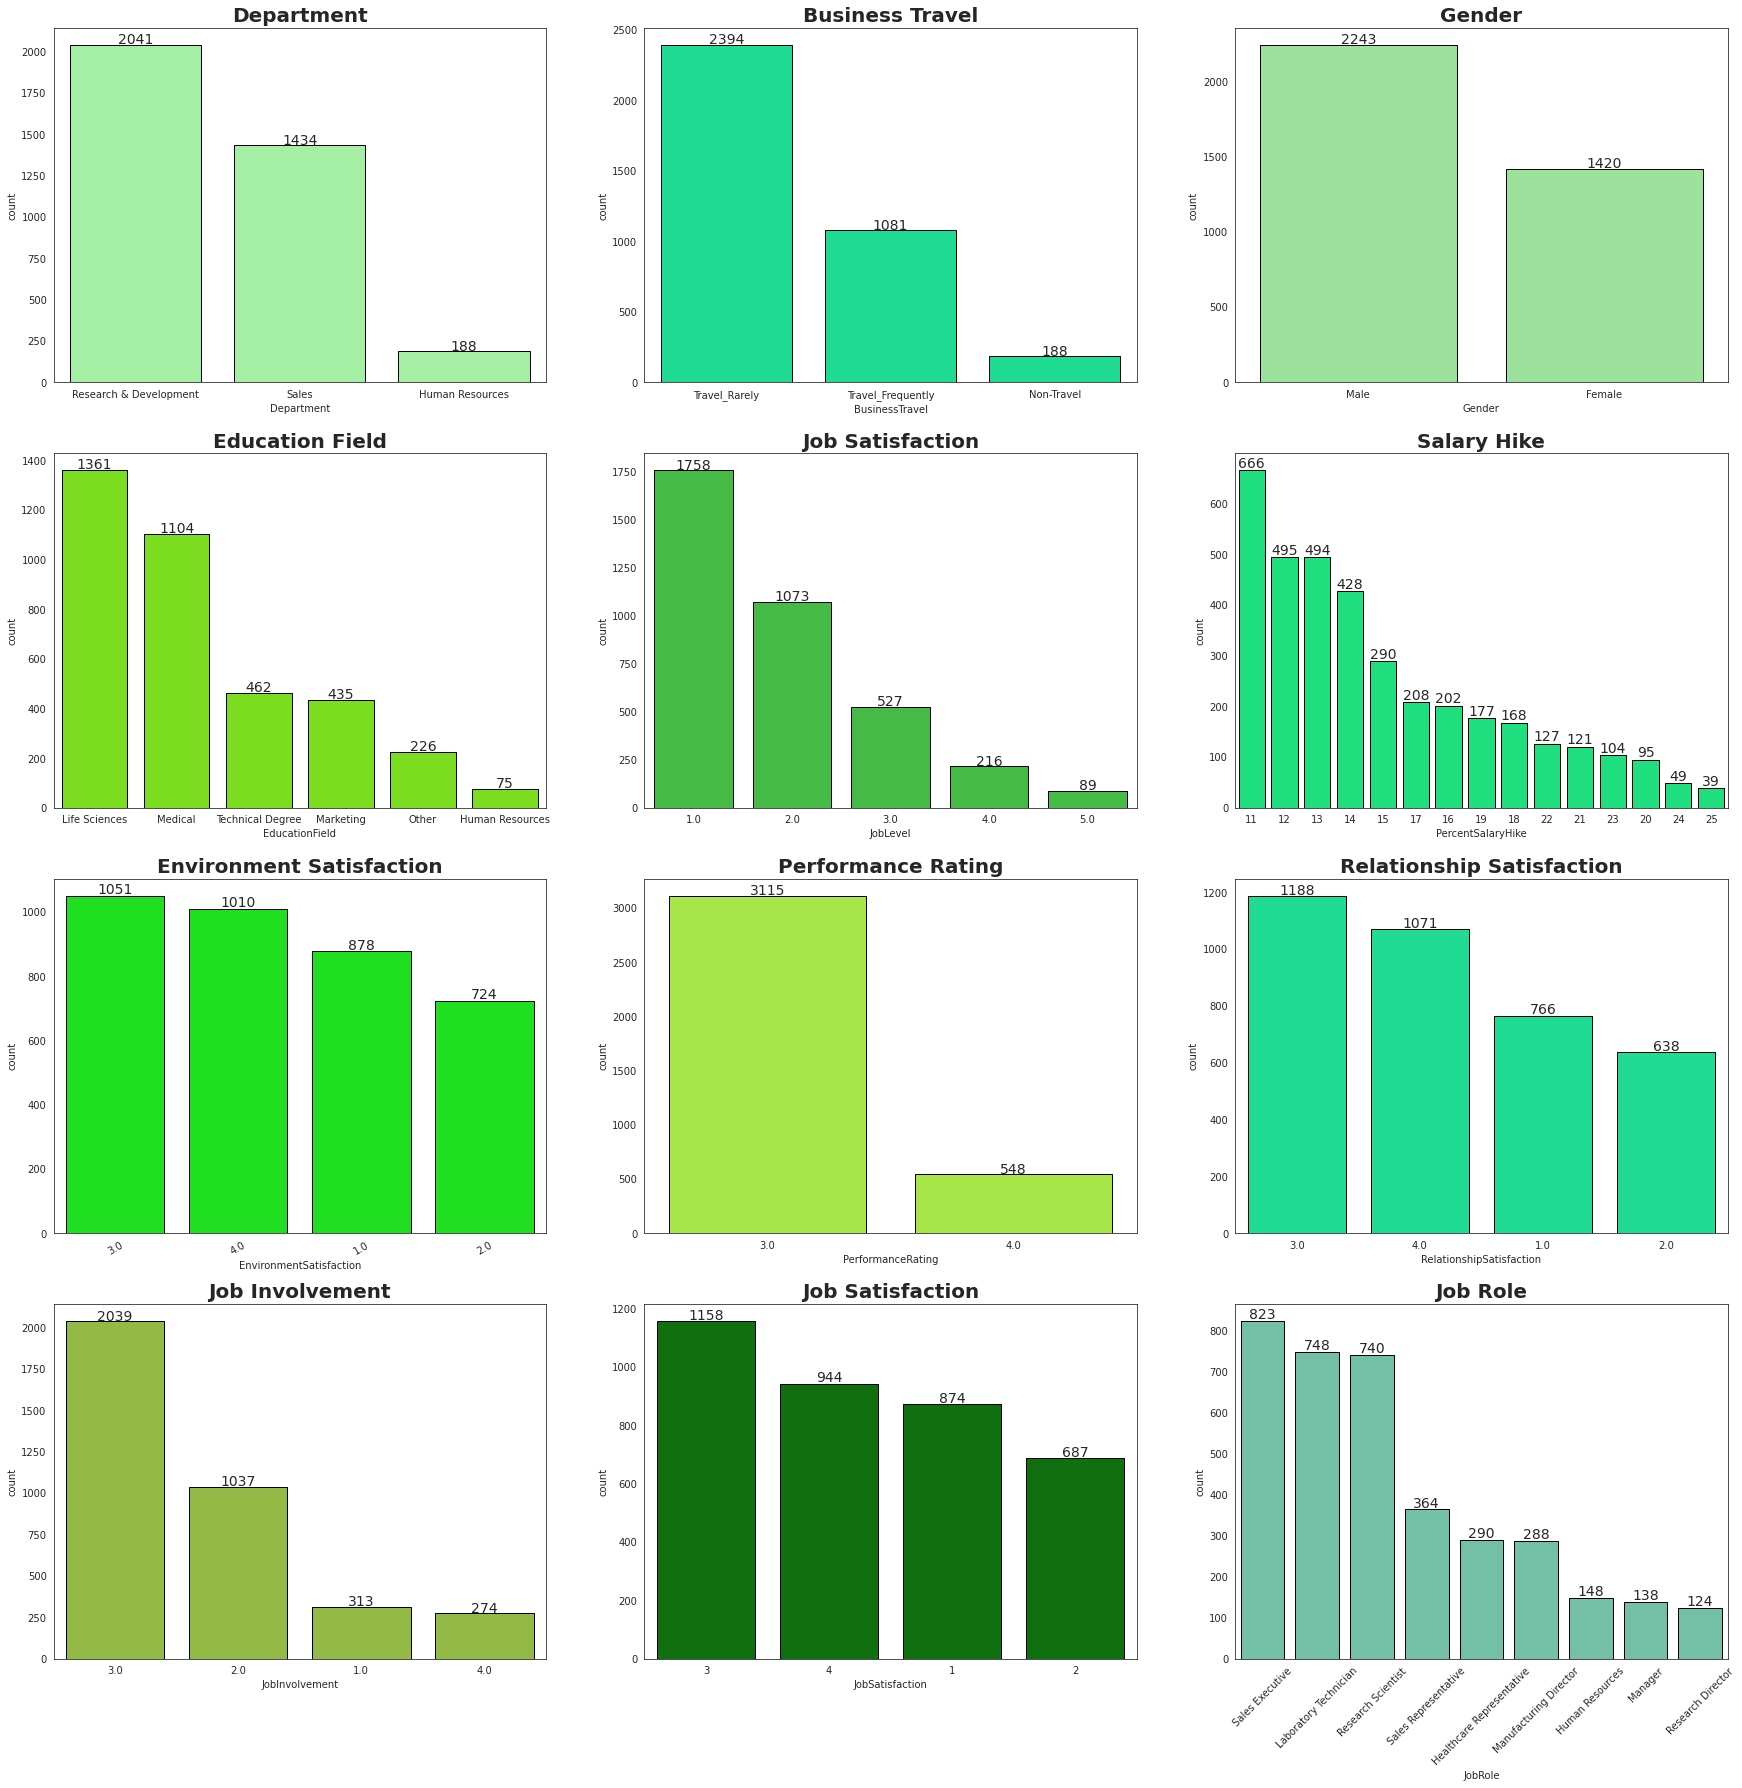

In [ ]:
#Barplot of All Resigned Employees
fig, axes = plt.subplots(4, 3, figsize=(30, 30))

#Department
sns.countplot(ax=axes[0, 0],x="Department", data = df_final_attr,order=df_final_attr['Department'].value_counts(ascending=False).index,edgecolor="Black", color='palegreen')
for rect in axes[0, 0].patches:
    axes[0, 0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[0, 0].set_title('Department',fontweight="bold", size=20)

#Business Travel
sns.countplot(ax=axes[0, 1],x="BusinessTravel",data = df_final_attr,order=df_final_attr['BusinessTravel'].value_counts(ascending=False).index,edgecolor="Black", color='mediumspringgreen')
for rect in axes[0, 1].patches:
    axes[0, 1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[0, 1].set_title('Business Travel',fontweight="bold", size=20)

#Gender
sns.countplot(ax=axes[0, 2],x="Gender", data = df_final_attr,order=df_final_attr['Gender'].value_counts(ascending=False).index,edgecolor="Black", color='lightgreen')
for rect in axes[0, 2].patches:
    axes[0, 2].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[0, 2].set_title('Gender',fontweight="bold", size=20)

#Education Field
sns.countplot(ax=axes[1, 0],x="EducationField", data = df_final_attr,order=df_final_attr['EducationField'].value_counts(ascending=False).index,edgecolor="Black", color='lawngreen')
for rect in axes[1, 0].patches:
    axes[1, 0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[1, 0].set_title('Education Field',fontweight="bold", size=20)

#Job Level
sns.countplot(ax=axes[1, 1],x="JobLevel", data = df_final_attr,order=df_final_attr['JobLevel'].value_counts(ascending=False).index,edgecolor="Black", color='limegreen')
for rect in axes[1, 1].patches:
    axes[1, 1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[1, 1].set_title('Job Satisfaction',fontweight="bold", size=20)

#Salary Hike
sns.countplot(ax=axes[1, 2],x="PercentSalaryHike", data = df_final_attr,order=df_final_attr['PercentSalaryHike'].value_counts(ascending=False).index,edgecolor="Black", color='springgreen')
for rect in axes[1, 2].patches:
    axes[1, 2].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[1, 2].set_title('Salary Hike',fontweight="bold", size=20)

#EnvironmentSatisfaction
sns.countplot(ax=axes[2, 0],x="EnvironmentSatisfaction", data = df_final_attr,order=df_final_attr['EnvironmentSatisfaction'].value_counts(ascending=False).index,edgecolor="Black", color='lime')
axes[2, 0].tick_params(axis = 'x',rotation = 30)
for rect in axes[2, 0].patches:
    axes[2, 0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[2,0].set_title('Environment Satisfaction',fontweight="bold", size=20)

#PerformanceRating
sns.countplot(ax=axes[2, 1],x="PerformanceRating", data = df_final_attr,order=df_final_attr['PerformanceRating'].value_counts(ascending=False).index,edgecolor="Black", color='greenyellow')
for rect in axes[2, 1].patches:
    axes[2, 1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[2,1].set_title('Performance Rating',fontweight="bold", size=20)


#RelationshipSatisfaction
sns.countplot(ax=axes[2, 2],x="RelationshipSatisfaction", data = df_final_attr,order=df_final_attr['RelationshipSatisfaction'].value_counts(ascending=False).index,edgecolor="Black", color='mediumspringgreen')
for rect in axes[2, 2].patches:
    axes[2, 2].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[2,2].set_title('Relationship Satisfaction',fontweight="bold", size=20)

#JobInvolvement
sns.countplot(ax=axes[3, 0],x="JobInvolvement", data = df_final_attr,order=df_final_attr['JobInvolvement'].value_counts(ascending=False).index,edgecolor="Black", color='yellowgreen')
for rect in axes[3, 0].patches:
    axes[3, 0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[3,0].set_title('Job Involvement',fontweight="bold", size=20)

#Job Satisfacation
sns.countplot(ax=axes[3, 1],x="JobSatisfaction", data = df_final_attr,order=df_final_attr['JobSatisfaction'].value_counts(ascending=False).index,edgecolor="Black", color='g')
for rect in axes[3, 1].patches:
    axes[3, 1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[3,1].set_title('Job Satisfaction',fontweight="bold", size=20)

#Job Role
sns.countplot(ax=axes[3, 2],x="JobRole", data = df_final_attr,order=df_final_attr['JobRole'].value_counts(ascending=False).index,edgecolor="Black", color='mediumaquamarine')
axes[3,2].tick_params(axis = 'x',rotation = 45)
for rect in axes[3, 2].patches:
    axes[3, 2].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 14)
axes[3,2].set_title('Job Role',fontweight="bold", size=20)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  float64
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EmployeeCount             23190 non-null  object 
 9   EmployeeNumber            23190 non-null  object 
 10  Application ID            23190 non-null  object 
 11  EnvironmentSatisfaction   23190 non-null  float64
 12  Gender                    23190 non-null  object 
 13  HourlyRate                23190 non-null  float64
 14  JobInv

# Data Preprocessing

In [ ]:
df_final.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [ ]:
print(df_final['BusinessTravel'].value_counts())

Travel_Rarely        16443
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64


In [ ]:
print(df_final['Department'].value_counts())

Research & Development    15125
Sales                      7056
Human Resources            1009
Name: Department, dtype: int64


In [ ]:
print(df_final['EducationField'].value_counts())

Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1304
Human Resources      441
Test                   1
Name: EducationField, dtype: int64


In [ ]:
print(df_final['Gender'].value_counts())

Male      13907
Female     9283
Name: Gender, dtype: int64


In [ ]:
print(df_final['JobRole'].value_counts())

Sales Executive              5057
Research Scientist           4592
Laboratory Technician        4100
Manufacturing Director       2361
Healthcare Representative    2077
Manager                      1585
Sales Representative         1299
Research Director            1281
Human Resources               838
Name: JobRole, dtype: int64


In [ ]:
print(df_final['MaritalStatus'].value_counts())

Married     10613
Single       7411
Divorced     5166
Name: MaritalStatus, dtype: int64


# Dropping Unnecessary Columns

In [ ]:
df_2 = df_final.drop(columns=['Employee Source', 'EmployeeCount','EmployeeNumber','Application ID'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  object 
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  float64
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EnvironmentSatisfaction   23190 non-null  float64
 9   Gender                    23190 non-null  object 
 10  HourlyRate                23190 non-null  float64
 11  JobInvolvement            23190 non-null  float64
 12  JobLevel                  23190 non-null  float64
 13  JobRole                   23190 non-null  object 
 14  JobSat

# Label Encoding of Categorical Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_2['Attrition'] = label_encoder.fit_transform(df_2['Attrition'])

In [ ]:
df_2['Attrition'].unique()

array([1, 0])

In [ ]:
df_2['Gender'] = label_encoder.fit_transform(df_2['Gender'])

In [ ]:
df_2['Gender'].unique()

array([0, 1])

In [ ]:
df_2['OverTime'] = label_encoder.fit_transform(df_2['OverTime'])

In [ ]:
df_2['OverTime'].unique()

array([1, 0])

In [ ]:
df_2.head(2)
#Left = 1, Stayed = 0
#Male = 1, Female= 0
#Yes = 1, No = 0

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0


In [ ]:
df_final['Gender'].value_counts()

Male      13907
Female     9283
Name: Gender, dtype: int64

In [ ]:
df_2['Gender'].value_counts()

1    13907
0     9283
Name: Gender, dtype: int64

# One Hot Encoder

In [ ]:
df_3 = pd.get_dummies(df_2.BusinessTravel)
df_3.tail(5)

,Non-Travel,Travel_Frequently,Travel_Rarely
23428,0,0,1
23429,0,0,1
23430,0,0,1
23431,0,0,1
23432,0,0,1


In [ ]:
df_4 = pd.get_dummies(df_2.Department,prefix='Dept')
df_4.tail(5)

,Dept_Human Resources,Dept_Research & Development,Dept_Sales
23428,0,1,0
23429,0,1,0
23430,0,1,0
23431,0,1,0
23432,0,1,0


In [ ]:
df_5 = pd.get_dummies(df_2.JobRole,prefix='Role')
df_5.tail(5)

,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative
23428,1,0,0,0,0,0,0,0,0
23429,1,0,0,0,0,0,0,0,0
23430,1,0,0,0,0,0,0,0,0
23431,1,0,0,0,0,0,0,0,0
23432,1,0,0,0,0,0,0,0,0


In [ ]:
df_6 = pd.get_dummies(df_2.MaritalStatus,prefix = 'Status')
df_6.tail(5)

,Status_Divorced,Status_Married,Status_Single
23428,1,0,0
23429,1,0,0
23430,1,0,0
23431,0,0,1
23432,1,0,0


# Drop The Encoded Columns

In [ ]:
df_2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [ ]:
#Columns to Drop
#BusinessTravel
#Department
#EducationField
#JobRole
#MaritalStatus

In [ ]:
dataframes = [df_2,df_3,df_4,df_5,df_6]
df_7 = pd.concat(dataframes, axis=1)
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             23190 non-null  float64
 1   Attrition                       23190 non-null  int64  
 2   BusinessTravel                  23190 non-null  object 
 3   DailyRate                       23190 non-null  float64
 4   Department                      23190 non-null  object 
 5   DistanceFromHome                23190 non-null  float64
 6   Education                       23190 non-null  float64
 7   EducationField                  23190 non-null  object 
 8   EnvironmentSatisfaction         23190 non-null  float64
 9   Gender                          23190 non-null  int64  
 10  HourlyRate                      23190 non-null  float64
 11  JobInvolvement                  23190 non-null  float64
 12  JobLevel                        

In [ ]:
df_X = df_7.drop(columns=['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus','Over18'])
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             23190 non-null  float64
 1   Attrition                       23190 non-null  int64  
 2   DailyRate                       23190 non-null  float64
 3   DistanceFromHome                23190 non-null  float64
 4   Education                       23190 non-null  float64
 5   EnvironmentSatisfaction         23190 non-null  float64
 6   Gender                          23190 non-null  int64  
 7   HourlyRate                      23190 non-null  float64
 8   JobInvolvement                  23190 non-null  float64
 9   JobLevel                        23190 non-null  float64
 10  JobSatisfaction                 23190 non-null  float64
 11  MonthlyIncome                   23190 non-null  float64
 12  MonthlyRate                     

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             23190 non-null  float64
 1   Attrition                       23190 non-null  int64  
 2   DailyRate                       23190 non-null  float64
 3   DistanceFromHome                23190 non-null  float64
 4   Education                       23190 non-null  float64
 5   EnvironmentSatisfaction         23190 non-null  float64
 6   Gender                          23190 non-null  int64  
 7   HourlyRate                      23190 non-null  float64
 8   JobInvolvement                  23190 non-null  float64
 9   JobLevel                        23190 non-null  float64
 10  JobSatisfaction                 23190 non-null  float64
 11  MonthlyIncome                   23190 non-null  float64
 12  MonthlyRate                     

# Key Drive Analysis

In [ ]:
#Use Catboost for Categorical Features
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import seaborn as sns
import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier 
from sklearn.model_selection import train_test_split

catboost version: 1.0.6


In [ ]:
#Identify Inputs and Outputs
inputs = df_X.drop(columns=['Attrition'])
output = df_X['Attrition']
output

0        1
1        1
2        1
3        1
4        1
        ..
23428    0
23429    0
23430    0
23431    0
23432    0
Name: Attrition, Length: 23190, dtype: int64

In [ ]:
# map categorical features
features = [feat for feat in list(df_X) 
            if feat != 'Attrition']
print(features)

categorical_features = np.where(inputs[features].dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(inputs[features], 
                                                    df_X[['Attrition']], 
                                                    test_size=0.2, 
                                                     random_state=1)

params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Dept_Human Resources', 'Dept_Research & Development', 'Dept_Sales', 'Role_Healthcare Representative', 'Role_Human Resources', 'Role_Laboratory Technician', 'Role_Manager', 'Role_Manufacturing Director', 'Role_Research Director', 'Role_Research Scientist', 'Role_Sales Executive', 'Role_Sales Representative', 'Status_Divorced', 'Status_Married', 'Status_Single']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6312170	best: 0.6312170 (0)	total: 60.1ms	remaining: 5m
200:	test: 0.7668995	best: 0.7668995 (200)	total: 4.33s	remaining: 1m 43s
400:	test: 0.7983062	best: 0.7983062 (400)	total: 8.93s	remaining: 1m 42s
600:	test: 0.8227216	best: 0.8227216 (600)	total: 13.1s	remaining: 1m 35s
800:	test: 0.8426565	best: 0.8426595 (799)	total: 19s	remaining: 1m 39s
1000:	test: 0.8598990	best: 0.8598990 (1000)	total: 25.3s	remaining: 1m 40s
1200:	test: 0.8733609	best: 0.8733609 (1200)	total: 30.9s	remaining: 1m 37s
1400:	test: 0.8849539	best: 0.8849539 (1400)	total: 36s	remaining: 1m 32s
1600:	test: 0.8963871	best: 0.8963871 (1600)	total: 39.5s	remaining: 1m 23s
1800:	test: 0.9068008	best: 0.9068181 (1799)	total: 43.1s	remaining: 1m 16s
2000:	test: 0.9147916	best: 0.9147916 (2000)	total: 45.2s	remaining: 1m 7s
2200:	test: 0.9216793	best: 0.9216793 (2200)	total: 46.5s	remaining: 59.2s
2400:	test: 0.9284140	best: 0.9284140 (2400)	total: 47.9s	remaining: 51.8s
2600:	test: 0.9344252	best: 0.934440

In [ ]:
categorical_features

array([ 5, 13, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43])

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.8 MB/s 


In [ ]:
import shap  # package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. 

from catboost import CatBoostClassifier, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

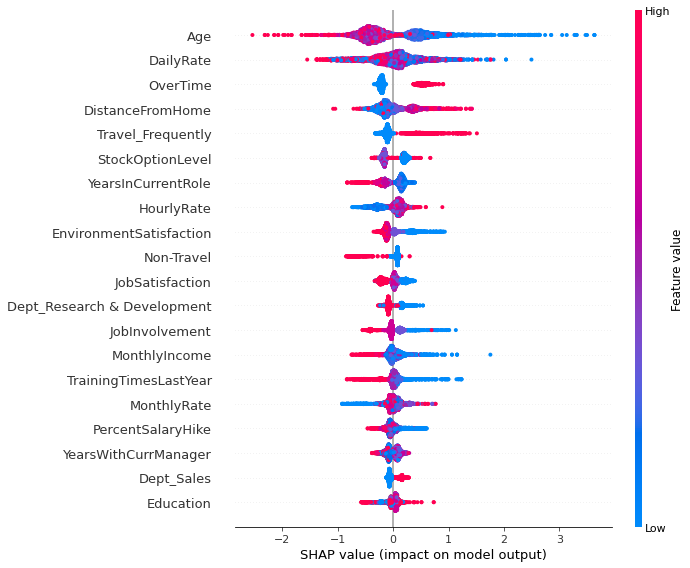

In [ ]:
shap.summary_plot(shap_values, X_test, plot_size=[10,8])

# Splitting the Dataset and Feature Scaling

In [ ]:
X = inputs.iloc[:,:].values
y = output.values

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 0)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.40e+01 8.23e+02 1.70e+01 ... 0.00e+00 1.00e+00 0.00e+00]
 [2.20e+01 4.57e+02 2.60e+01 ... 0.00e+00 1.00e+00 0.00e+00]
 [4.10e+01 4.27e+02 1.00e+01 ... 1.00e+00 0.00e+00 0.00e+00]
 ...
 [2.90e+01 4.61e+02 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [3.20e+01 5.15e+02 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [3.40e+01 1.44e+03 7.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]]
[[3.700e+01 6.740e+02 1.300e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.100e+01 4.270e+02 1.000e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.500e+01 8.670e+02 1.900e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [3.400e+01 1.130e+03 3.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.600e+01 1.195e+03 1.100e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [4.700e+01 5.430e+02 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]
[0 0 0 ... 0 1 0]
[0 0 1 ... 0 0 0]


In [ ]:
#Feature Scaling
from sklearn .preprocessing import StandardScaler
sc = StandardScaler()
X_train_fs = sc.fit_transform(X_train)
X_test_fs = sc.fit_transform(X_test)

In [ ]:
print(X_train_fs)
print(X_test_fs)
print(y_train)
print(y_test)

[[-1.41416295  0.04844116  0.9635886  ... -0.53675457  1.09132035
  -0.68586383]
 [-1.63319512 -0.86152417  2.0763288  ... -0.53675457  1.09132035
  -0.68586383]
 [ 0.44761047 -0.93611149  0.098124   ...  1.86304889 -0.91632123
  -0.68586383]
 ...
 [-0.86658253 -0.85157919 -1.0146162  ... -0.53675457 -0.91632123
   1.45801535]
 [-0.53803428 -0.71732201 -1.0146162  ... -0.53675457 -0.91632123
   1.45801535]
 [-0.31900212  1.58245375 -0.2727894  ... -0.53675457 -0.91632123
   1.45801535]]
[[ 0.00515272 -0.30640616  0.47552401 ... -0.53120244  1.08049833
  -0.6837226 ]
 [ 0.44611877 -0.91460552  0.1064359  ...  1.88252149 -0.92549889
  -0.6837226 ]
 [-1.31774545  0.16882653  1.21370024 ... -0.53120244  1.08049833
  -0.6837226 ]
 ...
 [-0.32557183  0.81642342 -0.7547697  ... -0.53120244  1.08049833
  -0.6837226 ]
 [-0.1050888   0.97647589  0.22946527 ... -0.53120244 -0.92549889
   1.46258147]
 [ 1.10756786 -0.62897344 -0.87779907 ... -0.53120244 -0.92549889
   1.46258147]]
[0 0 0 ... 0 1 0

# Training the Logistic Regression Model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_fs,y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the New Results
y_pred = classifier.predict(X_test_fs)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[[4812   60]
 [ 828   98]]


0.8468437392204209

In [ ]:
inputs

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41.0,1102.0,1.0,2.0,2.0,0,94.0,3.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,1
1,41.0,1102.0,1.0,2.0,2.0,0,94.0,3.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,1
2,41.0,1102.0,1.0,2.0,2.0,0,94.0,3.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,1
3,41.0,1102.0,1.0,2.0,2.0,0,94.0,3.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,1
4,41.0,1102.0,1.0,2.0,2.0,0,94.0,3.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,370.0,1.0,4.0,3.0,1,92.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,1,0,0
23429,60.0,370.0,1.0,4.0,3.0,1,92.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,1,0,0
23430,60.0,370.0,1.0,4.0,3.0,1,92.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,1,0,0
23431,60.0,370.0,1.0,4.0,3.0,1,92.0,1.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,1


#  Training a Decision Tree Classifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion ='entropy',max_depth = 8,random_state=0)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [ ]:
y_pred = classifier2.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
conf = confusion_matrix(y_test, y_pred)
print(conf)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision Score : ',precision_score(y_test, y_pred))
print('Recall Score : ',recall_score(y_test, y_pred))
print('f1_score : ',f1_score(y_test, y_pred))

[[3874   45]
 [ 449  270]]
Accuracy:  0.8934885726606295
Precision Score :  0.8571428571428571
Recall Score :  0.37552155771905427
f1_score :  0.5222437137330755


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
conf = confusion_matrix(y_test, y_pred)
print(conf)
accuracy_score(y_test, y_pred)

[[3874   45]
 [ 449  270]]


0.8934885726606295

Text(0.5, 15.0, 'Predicted label')

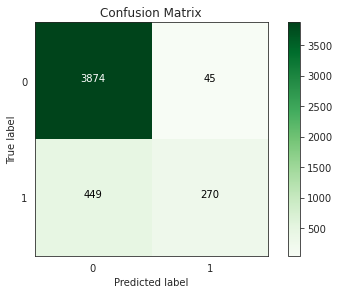

In [ ]:
classes = [0, 1]

# plot confusion matrix
sns.set_style('white')
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
feature_names = [i for i  in inputs.columns]
y_train_str = output.astype('str')
y_train_str[y_train_str=='0']="Stayed"
y_train_str[y_train_str=='1']="Left"
y_train_str = y_train_str.values
y_train_str

array(['Left', 'Left', 'Left', ..., 'Stayed', 'Stayed', 'Stayed'],
      dtype=object)

In [ ]:
import graphviz

In [ ]:
from sklearn import tree
dot_data=tree.export_graphviz(classifier2,out_file=None, feature_names=feature_names, class_names=['Stay','Leave'], filled=True,rounded= True, special_characters = True )

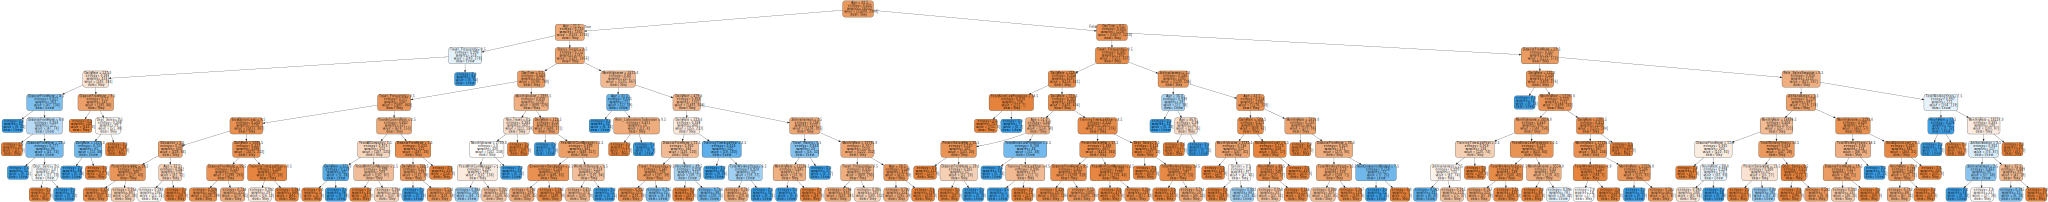

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn import metrics

In [ ]:
# log in accuracies for both train and test set
train_acc = []
test_acc = []

In [ ]:
# look at all possible depths of the tree

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for depth in range(1,25):
  # setup model
  tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=depth,random_state=0)
  tree_model.fit(X_train, y_train)

  # setup predictions
  train_pred = tree_model.predict(X_train)
  test_pred = tree_model.predict(X_test)

  # setup accuracies
  train_acc1 = metrics.accuracy_score(y_train, train_pred)
  test_acc1 = metrics.accuracy_score(y_test, test_pred)

  # consolidate (for the loop)
  #train_acc.append(train_acc)
  train_acc = np.append(train_acc, train_acc1)
  test_acc = np.append(test_acc, test_acc1)

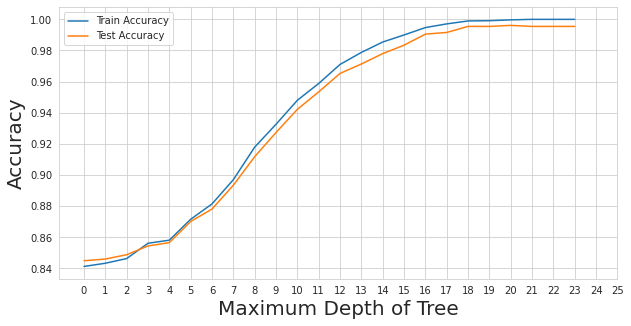

In [ ]:
# Learning Curves

plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_acc, 
         label='Train Accuracy')
plt.plot(test_acc, 
         label='Test Accuracy')
plt.legend(loc='upper left')
plt.xticks(range(0, 26, 1))
plt.xlabel('Maximum Depth of Tree', size = 20)
plt.ylabel('Accuracy', size = 20)

plt.show()

In [ ]:
# log in f1 for both train and test set
train_f1 = []
test_f1 = []

# look at all possible depths of the tree for F1 (unbalanced)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for depth in range(1,25):
  # setup model
  tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=depth,random_state=0)
  tree_model.fit(X_train, y_train)

  # setup predictions
  train_pred = tree_model.predict(X_train)
  test_pred = tree_model.predict(X_test)

  # setup accuracies
  train_f1_a = metrics.f1_score(y_train, train_pred)
  test_f1_a = metrics.f1_score(y_test, test_pred)

  # consolidate (for the loop)
  #train_acc.append(train_acc)
  train_f1 = np.append(train_f1, train_f1_a)
  test_f1 = np.append(test_f1, test_f1_a)

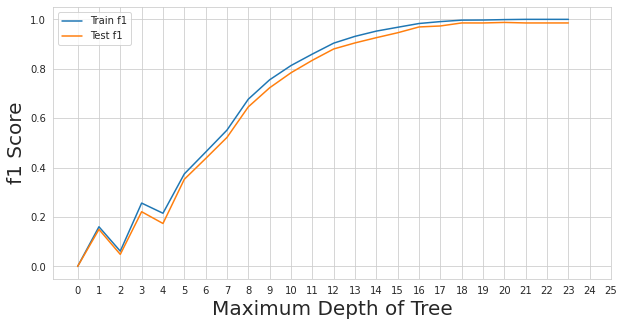

In [ ]:
# f1 Curves

plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_f1, 
         label='Train f1')
plt.plot(test_f1, 
         label='Test f1')
plt.legend(loc='upper left')
plt.xticks(range(0, 26, 1))
plt.xlabel('Maximum Depth of Tree', size = 20)
plt.ylabel('f1 Score', size = 20)

plt.show()

In [ ]:
# log in recall for both train and test set
train_recall = []
test_recall = []

# look at all possible depths of the tree for F1 (unbalanced)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for depth in range(1,25):
  # setup model
  tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=depth,random_state=0)
  tree_model.fit(X_train, y_train)

  # setup predictions
  train_pred = tree_model.predict(X_train)
  test_pred = tree_model.predict(X_test)

  # setup accuracies
  train_recall_a = metrics.recall_score(y_train, train_pred)
  test_recall_a = metrics.recall_score(y_test, test_pred)

  # consolidate (for the loop)
  #train_acc.append(train_acc)
  train_recall = np.append(train_recall, train_recall_a)
  test_recall = np.append(test_recall, test_recall_a)

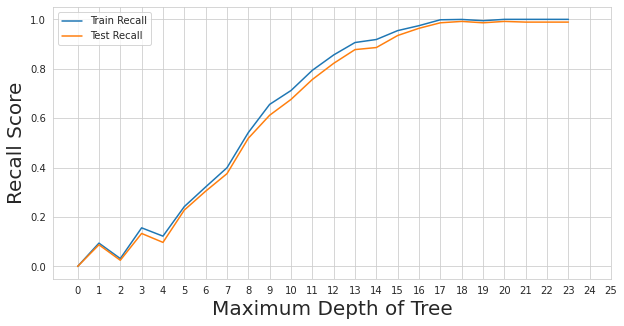

In [ ]:
# Recall

plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_recall, 
         label='Train Recall')
plt.plot(test_recall, 
         label='Test Recall')
plt.legend(loc='upper left')
plt.xticks(range(0, 26, 1))
plt.xlabel('Maximum Depth of Tree', size = 20)
plt.ylabel('Recall Score', size = 20)

plt.show()

In [ ]:
# log in recall for both train and test set
train_precision = []
test_precision = []

# look at all possible depths of the tree for F1 (unbalanced)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for depth in range(1,25):
  # setup model
  tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=depth,random_state=0)
  tree_model.fit(X_train, y_train)

  # setup predictions
  train_pred = tree_model.predict(X_train)
  test_pred = tree_model.predict(X_test)

  # setup accuracies
  train_precision_a = metrics.precision_score(y_train, train_pred)
  test_precision_a = metrics.precision_score(y_test, test_pred)

  # consolidate (for the loop)
  #train_acc.append(train_acc)
  train_precision = np.append(train_precision, train_precision_a)
  test_precision= np.append(test_precision, test_precision_a)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


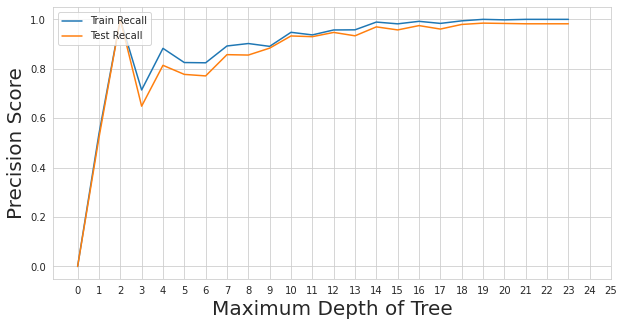

In [ ]:
# f1 Curves

plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_precision, 
         label='Train Recall')
plt.plot(test_precision, 
         label='Test Recall')
plt.legend(loc='upper left')
plt.xticks(range(0, 26, 1))
plt.xlabel('Maximum Depth of Tree', size = 20)
plt.ylabel('Precision Score', size = 20)

plt.show()